In [90]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None, 'display.max_rows', None)
import seaborn as sns

In [80]:
df_vehicles = pd.read_csv('vehicles.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [81]:
df_vehicles_v2 = df_vehicles.drop(columns = ['co2', 'engId', 'id', 'barrels08', 'fuelType1','charge120', 'barrelsA08', 'fuelType2', 'city08', 'cityA08', 'co2A', 'combA08', 'combE', 'range','rangeCity','rangeHwy','atvType','charge240', 'city08U', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08U', 'combA08U', 'combinedCD', 'combinedUF', 'evMotor', 'feScore', 'fuelCost08', 'fuelCostA08', 'ghgScore', 'ghgScoreA', 'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD','highwayE','highwayUF','hlv','hpv','lv2','lv4', 'mfrCode','mpgData','phevBlended','pv2','pv4','rangeA','rangeCityA', 'rangeHwyA', 'trans_dscr', 'UCity', 'UCityA', 'UHighway', 'UHighwayA', 'youSaveSpend', 'c240Dscr', 'charge240b', 'c240bDscr', 'createdOn', 'modifiedOn', 'phevCity', 'phevHwy', 'phevComb'])

In [82]:
df_vehicles_v2[['guzzler', 'tCharger', 'sCharger', 'startStop']] = df_vehicles_v2[['guzzler', 'tCharger', 'sCharger', 'startStop']].fillna(value='F')

In [83]:
df_vehicles_v2 = df_vehicles_v2.dropna(how='any',axis=0)

In [84]:
df_vehicles_v2.head(5)

,comb08,cylinders,displ,drive,eng_dscr,fuelType,make,model,trany,VClass,year,guzzler,tCharger,sCharger,startStop
0,21,4.0,2.0,Rear-Wheel Drive,(FFS),Regular,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Two Seaters,1985,F,F,F,F
1,11,12.0,4.9,Rear-Wheel Drive,(GUZZLER),Regular,Ferrari,Testarossa,Manual 5-spd,Two Seaters,1985,T,F,F,F
2,27,4.0,2.2,Front-Wheel Drive,(FFS),Regular,Dodge,Charger,Manual 5-spd,Subcompact Cars,1985,F,F,F,F
4,19,4.0,2.2,4-Wheel or All-Wheel Drive,"(FFS,TRBO)",Premium,Subaru,Legacy AWD Turbo,Manual 5-spd,Compact Cars,1993,F,T,F,F
5,22,4.0,1.8,Front-Wheel Drive,(FFS),Regular,Subaru,Loyale,Automatic 3-spd,Compact Cars,1993,F,F,F,F


In [85]:
df_models = df_vehicles_v2[['make', 'model']]

In [86]:
df_models.head()

,make,model
0,Alfa Romeo,Spider Veloce 2000
1,Ferrari,Testarossa
2,Dodge,Charger
4,Subaru,Legacy AWD Turbo
5,Subaru,Loyale


In [87]:
df_vehicles_v3 = pd.get_dummies(df_vehicles_v2, columns=['drive', 'eng_dscr','fuelType','make','trany','VClass'])

In [88]:
df_vehicles_v3['guzzler'] = np.where(df_vehicles_v3['guzzler'] == 'T', 1, 0)
df_vehicles_v3['tCharger'] = np.where(df_vehicles_v3['tCharger'] == 'T', 1, 0)
df_vehicles_v3['sCharger'] = np.where(df_vehicles_v3['sCharger'] == 'T', 1, 0)
df_vehicles_v3['startStop'] = np.where(df_vehicles_v3['startStop'] == 'T', 1, 0)

In [89]:
df_vehicles_v3.head()

,comb08,cylinders,displ,model,year,guzzler,tCharger,sCharger,startStop,drive_2-Wheel Drive,drive_4-Wheel Drive,drive_4-Wheel or All-Wheel Drive,drive_All-Wheel Drive,drive_Front-Wheel Drive,drive_Part-time 4-Wheel Drive,drive_Rear-Wheel Drive,eng_dscr_(121) (FFS),eng_dscr_(122) (FFS),eng_dscr_(16 VALVE) (FFS) (MPFI),eng_dscr_(16-VALVE) (FFS),eng_dscr_(16-VALVE) (FFS) (MPFI),"eng_dscr_(16-VALVE) (FFS,TRBO)",eng_dscr_(164S) (FFS) (MPFI),eng_dscr_(16VALVES) (FFS),eng_dscr_(2 VALVE) (FFS) (MPFI),eng_dscr_(2-VALVE) (FFS),eng_dscr_(20-VALVE) (FFS),"eng_dscr_(20-VALVE) (FFS,TRBO)",eng_dscr_(305),eng_dscr_(305) (FFS),eng_dscr_(307) (FFS),eng_dscr_(350 V8),eng_dscr_(350 V8) (DIESEL),eng_dscr_(350 V8) (FFS),eng_dscr_(350 V8) (FFS) FI,eng_dscr_(350 V8) (FFS) (MPFI),eng_dscr_(350 V8) (FFS) CA model,eng_dscr_(350 V8) (GUZZLER) (FFS),"eng_dscr_(350 V8) (GUZZLER) (FFS,TRBO)",eng_dscr_(350 V8) (GUZZLER) (POLICE) (FFS),eng_dscr_(350 V8) (POLICE) (FFS),eng_dscr_(350 V8) POLICE FFS MPFI,eng_dscr_(3S-FE) (FFS),eng_dscr_(3S-GE) (FFS),"eng_dscr_(3S-GTE) (FFS,TRBO)",eng_dscr_(4- VALVE) (FFS),eng_dscr_(4-VALVE) (FFS),eng_dscr_(4-VALVE) (FFS) (MPFI),eng_dscr_(4-VLV) (FFS),eng_dscr_(4A-F) (FFS),eng_dscr_(4A-FE) (FFS),eng_dscr_(4A-GE) (FFS),eng_dscr_(4A-LC) (FFS),eng_dscr_(8-VALVE) (FFS),"eng_dscr_(A-ENGINE) (FFS,TRBO)","eng_dscr_(B-ENGINE) (FFS,TRBO)",eng_dscr_(B201) (FFS),eng_dscr_(B202) (FFS),"eng_dscr_(B202) (FFS,TRBO)",eng_dscr_(BENDIX) (FFS),eng_dscr_(BOSCH) (FFS),eng_dscr_(C-ENGINE) (FFS) (MPFI),eng_dscr_(CAL)(FFS),eng_dscr_(CALIF),"eng_dscr_(CALIF) (DSL,TRBO)","eng_dscr_(CALIF) (FFS,TRBO)",eng_dscr_(CALIF) CA model,eng_dscr_(DIESEL),eng_dscr_(DIESEL) (NO-CAT),eng_dscr_(DIESEL) CA model,eng_dscr_(DOHC) (FFS),"eng_dscr_(DOHC) (FFS,TRBO)","eng_dscr_(DSL,TRBO)","eng_dscr_(DSL,TRBO) (MPFI)","eng_dscr_(DSL,TRBO) (MPFI) (NO-CAT)","eng_dscr_(DSL,TRBO) (NO-CAT)","eng_dscr_(DSL,TRBO) CA model",eng_dscr_(EGR) (FFS),eng_dscr_(EGR) (FFS),eng_dscr_(FFS TURBO),eng_dscr_(FFS),eng_dscr_(FFS) (FFS),eng_dscr_(FFS) (GUZZLER),eng_dscr_(FFS) (MPFI),eng_dscr_(FFS) (MPFI) (S-CHARGE),eng_dscr_(FFS) (MPFI) DOHC,eng_dscr_(FFS) (MPFI) SOHC,eng_dscr_(FFS) (ROTARY),eng_dscr_(FFS) (S-CHARGE),eng_dscr_(FFS) (SPFI),eng_dscr_(FFS) (VARIABLE),eng_dscr_(FFS) FI,eng_dscr_(FFS) (DIESEL) (NO-CAT),eng_dscr_(FFS) (MPFI),eng_dscr_(FFS) (MPFI) FI,eng_dscr_(FFS) (SPFI),eng_dscr_(FFS) (SPFI) FI,eng_dscr_(FFS) 1 barrel carb,eng_dscr_(FFS) 2 barrel carb,eng_dscr_(FFS) 3 barrel carb,eng_dscr_(FFS) 4 barrel carb,eng_dscr_(FFS) BOSCH,eng_dscr_(FFS) CA model,eng_dscr_(FFS) DOHC,eng_dscr_(FFS) Fuel Injection,eng_dscr_(FFS) Lock-up,eng_dscr_(FFS) SOHC,eng_dscr_(FFS) fuel injection,eng_dscr_(FFS)(SIL),eng_dscr_(FFS)(SIL) CA model,"eng_dscr_(FFS,DOHC)","eng_dscr_(FFS,TRBO)","eng_dscr_(FFS,TRBO) (MPFI)","eng_dscr_(FFS,TRBO) (ROTARY)","eng_dscr_(FFS,TRBO) (SPFI)","eng_dscr_(FFS,TRBO) CA model","eng_dscr_(FFS,TRBO) Low Boost",eng_dscr_(FFS/TRBO),eng_dscr_(FFS/TRBO) CA model,eng_dscr_(GM-BUICK) CA model,eng_dscr_(GM-CHEV),eng_dscr_(GM-CHEV) (FFS),eng_dscr_(GM-CHEV) (FFS) (MPFI),eng_dscr_(GM-CHEV) (FFS) (SPFI),eng_dscr_(GM-CHEV) (FFS) CA model,eng_dscr_(GM-CHEV) (FFS),eng_dscr_(GM-CHEV) CA model,eng_dscr_(GM-OLDS),eng_dscr_(GM-OLDS) (FFS),eng_dscr_(GM-OLDS) (FFS) CA model,"eng_dscr_(GMP4) (FFS,TRBO) (MPFI)","eng_dscr_(GMP4+IC) (FFS,TRBO) (MPFI)",eng_dscr_(GUZZLER),eng_dscr_(GUZZLER) (FFS),eng_dscr_(GUZZLER) (FFS),eng_dscr_(GUZZLER) (FFS) (MPFI),eng_dscr_(GUZZLER) (FFS) (S-CHARGE),eng_dscr_(GUZZLER) (FFS) CA model,"eng_dscr_(GUZZLER) (FFS,TRBO)","eng_dscr_(GUZZLER) (FFS,TRBO) (MPFI)",eng_dscr_(GUZZLER) (GM-CHEVY) (FFS),eng_dscr_(GUZZLER) (GUZZLER) (FFS),eng_dscr_(GUZZLER) (L410MN2) (FFS),eng_dscr_(GUZZLER) (L410MNKT) (FFS),"eng_dscr_(GUZZLER) (L410MT2) (FFS,TRBO)","eng_dscr_(GUZZLER) (L410MTKT) (FFS,TRBO)",eng_dscr_(GUZZLER) (TURBO),eng_dscr_(GUZZLER) (TURBO) CA model,eng_dscr_(GUZZLER) (VOLVO780) (FFS),eng_dscr_(GUZZLER) 5 SERIES (FFS),eng_dscr_(GUZZLER) ASTON-DB7 (FFS),eng_dscr_(GUZZLER) FFS MPFI (FFS),

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


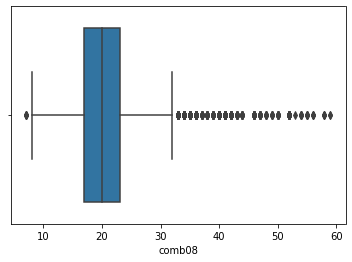

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


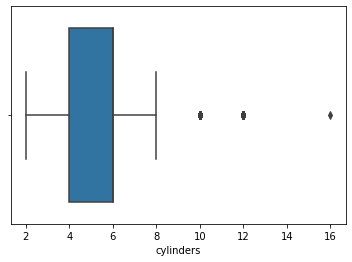

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


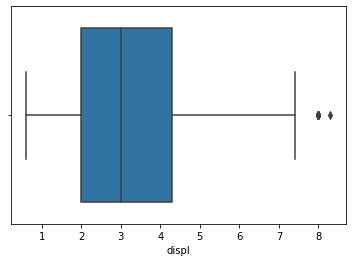

In [93]:

sns.boxplot(df_vehicles_v3['comb08'])
plt.show()
sns.boxplot(df_vehicles_v3['cylinders'])
plt.show()
sns.boxplot(df_vehicles_v3['displ'])
plt.show()

In [95]:
def outliers(df, col_name, q1=0.05, q3=0.95):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    IQR = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * IQR
    low_limit = quartile1 - 1.5 * IQR
    return df[(df[col_name]>=low_limit) & (df[col_name]<=up_limit)]

In [96]:
df_vehicles_v3=outliers(df_vehicles_v3, 'comb08')
df_vehicles_v3=outliers(df_vehicles_v3, 'cylinders')
df_vehicles_v3=outliers(df_vehicles_v3, 'displ')

In [102]:
from sklearn import preprocessing

In [103]:
df_vehicles_final = df_vehicles_v3.drop(columns=['model'])

In [108]:
columns_names = list(df_vehicles_final.columns)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_values = min_max_scaler.fit_transform(df_vehicles_final)
df_vehicles_final_scaled = pd.DataFrame(scaled_values)
df_vehicles_final_scaled.columns = columns_names

In [109]:
df_vehicles_final_scaled.head()


,comb08,cylinders,displ,year,guzzler,tCharger,sCharger,startStop,drive_2-Wheel Drive,drive_4-Wheel Drive,drive_4-Wheel or All-Wheel Drive,drive_All-Wheel Drive,drive_Front-Wheel Drive,drive_Part-time 4-Wheel Drive,drive_Rear-Wheel Drive,eng_dscr_(121) (FFS),eng_dscr_(122) (FFS),eng_dscr_(16 VALVE) (FFS) (MPFI),eng_dscr_(16-VALVE) (FFS),eng_dscr_(16-VALVE) (FFS) (MPFI),"eng_dscr_(16-VALVE) (FFS,TRBO)",eng_dscr_(164S) (FFS) (MPFI),eng_dscr_(16VALVES) (FFS),eng_dscr_(2 VALVE) (FFS) (MPFI),eng_dscr_(2-VALVE) (FFS),eng_dscr_(20-VALVE) (FFS),"eng_dscr_(20-VALVE) (FFS,TRBO)",eng_dscr_(305),eng_dscr_(305) (FFS),eng_dscr_(307) (FFS),eng_dscr_(350 V8),eng_dscr_(350 V8) (DIESEL),eng_dscr_(350 V8) (FFS),eng_dscr_(350 V8) (FFS) FI,eng_dscr_(350 V8) (FFS) (MPFI),eng_dscr_(350 V8) (FFS) CA model,eng_dscr_(350 V8) (GUZZLER) (FFS),"eng_dscr_(350 V8) (GUZZLER) (FFS,TRBO)",eng_dscr_(350 V8) (GUZZLER) (POLICE) (FFS),eng_dscr_(350 V8) (POLICE) (FFS),eng_dscr_(350 V8) POLICE FFS MPFI,eng_dscr_(3S-FE) (FFS),eng_dscr_(3S-GE) (FFS),"eng_dscr_(3S-GTE) (FFS,TRBO)",eng_dscr_(4- VALVE) (FFS),eng_dscr_(4-VALVE) (FFS),eng_dscr_(4-VALVE) (FFS) (MPFI),eng_dscr_(4-VLV) (FFS),eng_dscr_(4A-F) (FFS),eng_dscr_(4A-FE) (FFS),eng_dscr_(4A-GE) (FFS),eng_dscr_(4A-LC) (FFS),eng_dscr_(8-VALVE) (FFS),"eng_dscr_(A-ENGINE) (FFS,TRBO)","eng_dscr_(B-ENGINE) (FFS,TRBO)",eng_dscr_(B201) (FFS),eng_dscr_(B202) (FFS),"eng_dscr_(B202) (FFS,TRBO)",eng_dscr_(BENDIX) (FFS),eng_dscr_(BOSCH) (FFS),eng_dscr_(C-ENGINE) (FFS) (MPFI),eng_dscr_(CAL)(FFS),eng_dscr_(CALIF),"eng_dscr_(CALIF) (DSL,TRBO)","eng_dscr_(CALIF) (FFS,TRBO)",eng_dscr_(CALIF) CA model,eng_dscr_(DIESEL),eng_dscr_(DIESEL) (NO-CAT),eng_dscr_(DIESEL) CA model,eng_dscr_(DOHC) (FFS),"eng_dscr_(DOHC) (FFS,TRBO)","eng_dscr_(DSL,TRBO)","eng_dscr_(DSL,TRBO) (MPFI)","eng_dscr_(DSL,TRBO) (MPFI) (NO-CAT)","eng_dscr_(DSL,TRBO) (NO-CAT)","eng_dscr_(DSL,TRBO) CA model",eng_dscr_(EGR) (FFS),eng_dscr_(EGR) (FFS),eng_dscr_(FFS TURBO),eng_dscr_(FFS),eng_dscr_(FFS) (FFS),eng_dscr_(FFS) (GUZZLER),eng_dscr_(FFS) (MPFI),eng_dscr_(FFS) (MPFI) (S-CHARGE),eng_dscr_(FFS) (MPFI) DOHC,eng_dscr_(FFS) (MPFI) SOHC,eng_dscr_(FFS) (ROTARY),eng_dscr_(FFS) (S-CHARGE),eng_dscr_(FFS) (SPFI),eng_dscr_(FFS) (VARIABLE),eng_dscr_(FFS) FI,eng_dscr_(FFS) (DIESEL) (NO-CAT),eng_dscr_(FFS) (MPFI),eng_dscr_(FFS) (MPFI) FI,eng_dscr_(FFS) (SPFI),eng_dscr_(FFS) (SPFI) FI,eng_dscr_(FFS) 1 barrel carb,eng_dscr_(FFS) 2 barrel carb,eng_dscr_(FFS) 3 barrel carb,eng_dscr_(FFS) 4 barrel carb,eng_dscr_(FFS) BOSCH,eng_dscr_(FFS) CA model,eng_dscr_(FFS) DOHC,eng_dscr_(FFS) Fuel Injection,eng_dscr_(FFS) Lock-up,eng_dscr_(FFS) SOHC,eng_dscr_(FFS) fuel injection,eng_dscr_(FFS)(SIL),eng_dscr_(FFS)(SIL) CA model,"eng_dscr_(FFS,DOHC)","eng_dscr_(FFS,TRBO)","eng_dscr_(FFS,TRBO) (MPFI)","eng_dscr_(FFS,TRBO) (ROTARY)","eng_dscr_(FFS,TRBO) (SPFI)","eng_dscr_(FFS,TRBO) CA model","eng_dscr_(FFS,TRBO) Low Boost",eng_dscr_(FFS/TRBO),eng_dscr_(FFS/TRBO) CA model,eng_dscr_(GM-BUICK) CA model,eng_dscr_(GM-CHEV),eng_dscr_(GM-CHEV) (FFS),eng_dscr_(GM-CHEV) (FFS) (MPFI),eng_dscr_(GM-CHEV) (FFS) (SPFI),eng_dscr_(GM-CHEV) (FFS) CA model,eng_dscr_(GM-CHEV) (FFS),eng_dscr_(GM-CHEV) CA model,eng_dscr_(GM-OLDS),eng_dscr_(GM-OLDS) (FFS),eng_dscr_(GM-OLDS) (FFS) CA model,"eng_dscr_(GMP4) (FFS,TRBO) (MPFI)","eng_dscr_(GMP4+IC) (FFS,TRBO) (MPFI)",eng_dscr_(GUZZLER),eng_dscr_(GUZZLER) (FFS),eng_dscr_(GUZZLER) (FFS),eng_dscr_(GUZZLER) (FFS) (MPFI),eng_dscr_(GUZZLER) (FFS) (S-CHARGE),eng_dscr_(GUZZLER) (FFS) CA model,"eng_dscr_(GUZZLER) (FFS,TRBO)","eng_dscr_(GUZZLER) (FFS,TRBO) (MPFI)",eng_dscr_(GUZZLER) (GM-CHEVY) (FFS),eng_dscr_(GUZZLER) (GUZZLER) (FFS),eng_dscr_(GUZZLER) (L410MN2) (FFS),eng_dscr_(GUZZLER) (L410MNKT) (FFS),"eng_dscr_(GUZZLER) (L410MT2) (FFS,TRBO)","eng_dscr_(GUZZLER) (L410MTKT) (FFS,TRBO)",eng_dscr_(GUZZLER) (TURBO),eng_dscr_(GUZZLER) (TURBO) CA model,eng_dscr_(GUZZLER) (VOLVO780) (FFS),eng_dscr_(GUZZLER) 5 SERIES (FFS),eng_dscr_(GUZZLER) ASTON-DB7 (FFS),eng_dscr_(GUZZLER) FFS MPFI (FFS),eng_ds

In [121]:
X = df_vehicles_final_scaled.drop(columns='comb08')
Y = df_vehicles_final_scaled['comb08']

In [122]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression
from sklearn.metrics import mean_squared_error

In [123]:
def reg_models(x, y, algo):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=97)
    algo.fit(X_train,Y_train)
    Y_train_pred=algo.predict(X_train)
    Y_test_pred=algo.predict(X_test)
    score=cross_val_score(algo,x,y,cv=10)
    train_error, train_score = mean_squared_error(Y_train, Y_train_pred), algo.score(X_train, Y_train)
    test_error,  test_score = mean_squared_error(Y_test, Y_test_pred), algo.score(X_test, Y_test)
    cross_score = np.round(score.mean(),4)
    print(type(algo).__name__)
    print('Train mse: {}'.format(train_error))
    print('Train Score: {}'.format(train_score))
    print('Test mse: {}'.format(test_error))
    print('Test Score: {}'.format(test_score))
    print('Mean of Cross Validation Score: {}'.format(cross_score))
    print('------------------------------------------------------')
    return (train_error, train_score, test_error,  test_score, cross_score)

In [126]:
models=[LinearRegression(), Ridge(), Lasso(), ElasticNet()]

In [127]:
for model in models:
    reg_models(X, Y, model)

LinearRegression
Train mse: 0.0017428261639504477
Train Score: 0.8727800493575897
Test mse: 3.2665325301153544e+16
Test Score: -2.399283258293935e+18
Mean of Cross Validation Score: -1.7477770553687572e+20
------------------------------------------------------
Ridge
Train mse: 0.0017630108447279633
Train Score: 0.8713066413118741
Test mse: 0.001898150845540574
Test Score: 0.8605799420812398
Mean of Cross Validation Score: 0.8273
------------------------------------------------------
Lasso
Train mse: 0.013699314888505043
Train Score: 0.0
Test mse: 0.01361806044738826
Test Score: -0.0002528412199718222
Mean of Cross Validation Score: -0.1039
------------------------------------------------------
ElasticNet
Train mse: 0.013699314888505043
Train Score: 0.0
Test mse: 0.01361806044738826
Test Score: -0.0002528412199718222
Mean of Cross Validation Score: -0.1039
------------------------------------------------------
